#Machine learning models for real estate price prediction in New York
####by Alexey Machikhin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
import pandas as pd

# Let's load the dataset from Renthop right away
with open('/content/drive/MyDrive/Colab Notebooks/train.json', 'r') as raw_data:
    data = json.load(raw_data)
    df = pd.DataFrame(data)

- bathrooms: number of bathrooms
- bedrooms: number of bathrooms
- features: a list of features about this apartment
- latitude: широта
- longitude: долгота
- photos: a list of photo links. You are welcome to download the pictures yourselves from renthop's site, but they are the same as imgs.zip. 
- price: in USD
- street_address
- interest_level: this is the target variable. It has 3 categories: 'high', 'medium', 'low'

In [ ]:
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB




---
###**Exploratory analysis and features generation**


---





**Missing values**

In [ ]:
!pip install scikit_na # handy library for NAs detection

In [ ]:
import scikit_na as na

In [ ]:
na.summary(df).T

,NA count,"NA, % (per column)","NA, % (of all NAs)",NA unique (per column),"NA unique, % (per column)",Rows left after dropna(),"Rows left after dropna(), %"
bathrooms,0.0,0.0,0.0,0.0,0.0,49352.0,100.0
bedrooms,0.0,0.0,0.0,0.0,0.0,49352.0,100.0
building_id,0.0,0.0,0.0,0.0,0.0,49352.0,100.0
created,0.0,0.0,0.0,0.0,0.0,49352.0,100.0
description,0.0,0.0,0.0,0.0,0.0,49352.0,100.0
display_address,0.0,0.0,0.0,0.0,0.0,49352.0,100.0
features,0.0,0.0,0.0,0.0,0.0,49352.0,100.0
latitude,0.0,0.0,0.0,0.0,0.0,49352.0,100.0
listing_id,0.0,0.0,0.0,0.0,0.0,49352.0,100.0
longitude,0.0,0.0,0.0,0.0,0.0,49352.0,100.0


No NAs in the dataset.

**Distribution of response variable - price**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bathrooms,49352.0,1.212180e+00,0.501420,0.000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01
bedrooms,49352.0,1.541640e+00,1.115018,0.000,1.000000e+00,1.000000e+00,2.000000e+00,8.000000e+00
latitude,49352.0,4.074154e+01,0.638535,0.000,4.072830e+01,4.075180e+01,4.077430e+01,4.488350e+01
listing_id,49352.0,7.024055e+06,126274.611244,6811957.000,6.915888e+06,7.021070e+06,7.128733e+06,7.753784e+06
longitude,49352.0,-7.395572e+01,1.177912,-118.271,-7.399170e+01,-7.397790e+01,-7.395480e+01,0.000000e+00
price,49352.0,3.830174e+03,22066.865885,43.000,2.500000e+03,3.150000e+03,4.100000e+03,4.490000e+06


In [ ]:
import numpy as np
import seaborn as sns
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10,6

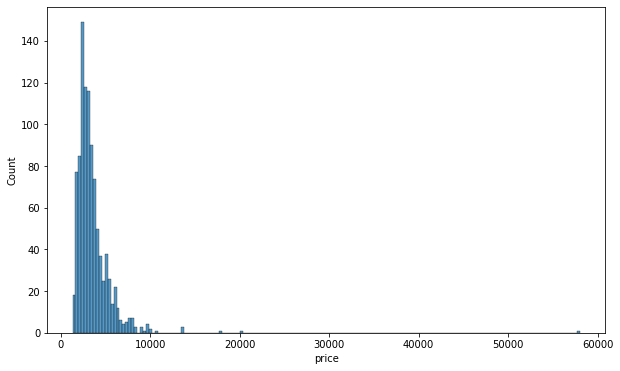

In [ ]:
sns.histplot(df['price'][:1000])

- Visually, the 'price' is not distributed normally. It is better to log the response.
- Moreover, there are several outliers that can distort the results of data analysis. Hence, these outliers should be exluded from the data set. 

In [ ]:
df = df[(df['price'] <= 20000) & (df['price'] > 500)]

In [ ]:
#df.shape

In [ ]:
df['price_log'] = np.log(df.price) 

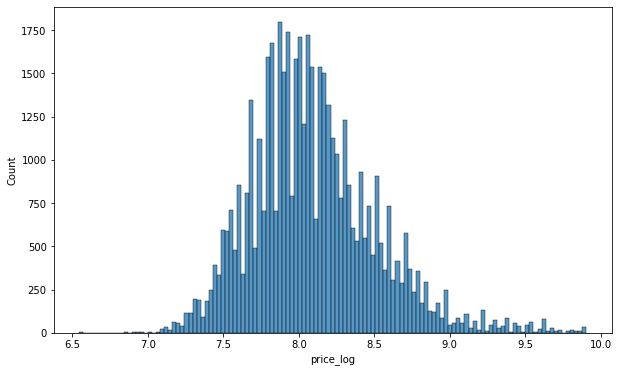

In [ ]:
sns.histplot(df['price_log']) # looks better

**Number of bathrooms & bedrooms**

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
df['bathrooms'].unique()

array([ 1. ,  1.5,  2. ,  0. ,  3. ,  4. ,  2.5,  3.5,  4.5,  5. ,  6.5,
        5.5, 10. ])

How can the number of bathrooms be float, not integer?
I think it's better to round these numbers. 

In [ ]:
df['bathrooms_int'] = df['bathrooms'].apply(np.ceil).astype(int)
df['bathrooms_int'].unique()

array([ 1,  2,  0,  3,  4,  5,  7,  6, 10])

In [ ]:
df['bedrooms'].unique() # ok

array([1, 2, 3, 0, 4, 5, 6, 8, 7])

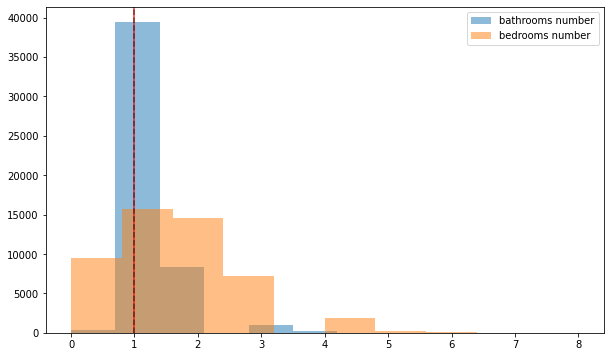

In [ ]:
plt.hist(df.bathrooms_int[df.bathrooms_int <= 7], alpha=0.5, label='bathrooms number')
plt.hist(df['bedrooms'], alpha=0.5, label='bedrooms number')
plt.axvline(x=df.bathrooms.median(), c='red', alpha=.8)
plt.axvline(x=df.bedrooms.median(), c='black', linestyle='--', alpha=.5)
plt.legend(loc='upper right')
plt.show()

- In the most common case, real estate with only one bathroom and a bedroom is put up for sale.
- Real estate with more than three bathrooms or bedrooms is a rare offer for  NY market. Hence, these offers may be concerned as outliers.

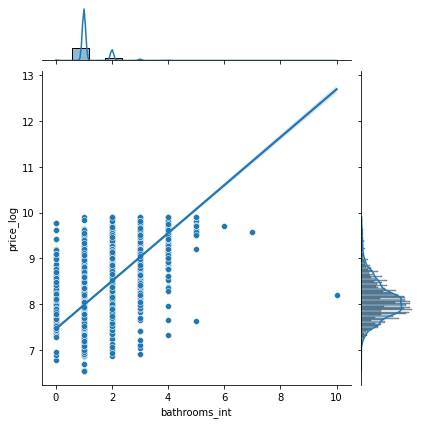

In [ ]:
j_bath = sns.jointplot(x='bathrooms_int', y='price_log', data=df, kind='reg', scatter = False)
sns.scatterplot(x='bathrooms_int', y='price_log', data=df, ax=j_bath.ax_joint)
plt.show()

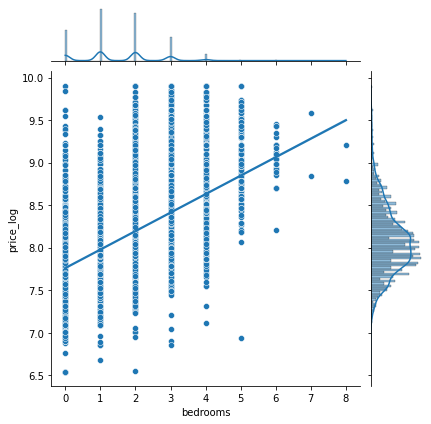

In [ ]:
j_bed = sns.jointplot(x='bedrooms', y='price_log', data=df, kind='reg', scatter = False)
sns.scatterplot(x='bedrooms', y='price_log', data=df, ax=j_bed.ax_joint)
plt.show()

With the increase of bedrooms and bathrooms number, the price also increases. 

**Features: what does include most of offers?**

Does list sizes in the 'features' column differ for observations?

In [ ]:
df['features_number'] = df['features'].apply(lambda x: len(x))

In [ ]:
#df['features'][0:4] 

In [ ]:
#df['features_number'][0:4] # correct lengths

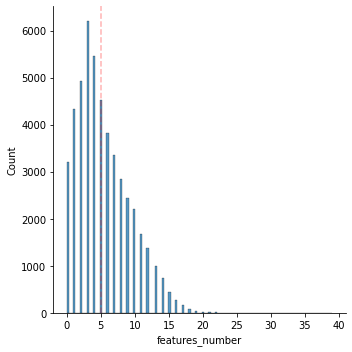

In [ ]:
sns.displot(df['features_number'])
plt.axvline(x=df['features_number'].median(), c='red', linestyle='--', alpha=.3)
plt.show()

Offers contain different number of features. The most common case - 4 features are included in the offer. 

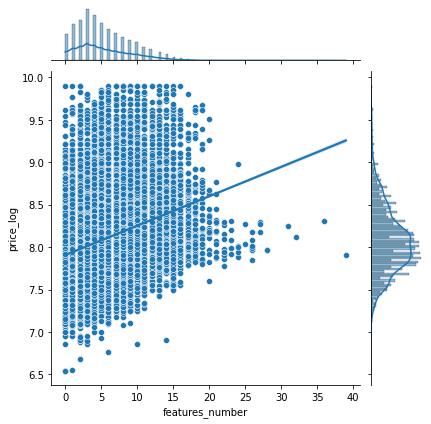

In [ ]:
j_feat = sns.jointplot(x='features_number', y='price_log', data=df, kind='reg', scatter = False)
sns.scatterplot(x='features_number', y='price_log', data=df, ax=j_feat.ax_joint)
plt.show()

**Extracting parameters from the 'Features' column**

- My strategy of transforming the "features" column into a parameter for ML models is to recode observations of this column (lists) into number of str. objects included in a single list. In other words, I count lenghts of lists in the "features" column. 
- Since price depends on the features number, I think think this "features_nember" variable can be used as a parameter for different ML models. 

**LDA topic modeling for descriptions of offers**

- I apply LDA topic modeling for features generation from text descriptions of real estate offers. 

*Text preprocessing for LDA topic modeling*

In [ ]:
import re

In [ ]:
# Removing punctuation/lower casing

df['text_processed'] = \
df['description'].map(lambda x: re.sub('[,\.!?:*/]', '', x))

# Convert the titles to lowercase
df['text_processed'] = \
df['text_processed'].map(lambda x: x.lower())

df['text_processed'] = \
df['text_processed'].map(lambda x: re.sub(' [a-z] ', ' ', x)) # deletion of lonely letters

df['text_processed'] = \
df['text_processed'].map(lambda x: re.sub('[0-9]', ' ', x)) # deletion of numbers

df['text_processed'] = \
df['text_processed'].map(lambda x: re.sub('\n', ' ', x))

df['text_processed'] = \
df['text_processed'].map(lambda x: re.sub('[*]', ' ', x))

df['text_processed'] = \
df['text_processed'].map(lambda x: re.sub('!', ' ', x))

df['text_processed'] = \
df['text_processed'].map(lambda x: re.sub('[.]', ' ', x))

df['text_processed'] = \
df['text_processed'].map(lambda x: re.sub('  ', ' ', x))

df['text_processed'] = \
df['text_processed'].map(lambda x: re.sub('br', ' ', x))

df['text_processed'] = \
df['text_processed'].map(lambda x: re.sub('kagglemanager', ' ', x))

# Print out the first rows of papers
df['text_processed'].head()

<>:4: DeprecationWarning: invalid escape sequence \.
<>:4: DeprecationWarning: invalid escape sequence \.
<>:4: DeprecationWarning: invalid escape sequence \.
<ipython-input-222-45a4db1e3d65>:4: DeprecationWarning: invalid escape sequence \.
  df['description'].map(lambda x: re.sub('[,\.!?:*/]', '', x))


4     spacious  bedroom  bathroom in williamsburgapa...
6      and new gut renovated true  bedroomfind yours...
9     flex  bedroom with full pressurized walllookin...
10    a  and new  bedroom  bath apartmentenjoy these...
15    over-sized studio abundant closets available i...
Name: text_processed, dtype: object

Frequancy of single words from "description" column demonstarted via a table earlier was not so handy. So, let's apply WordCloud to conduct exploratory analysis of text documents containing in the "features" column. 

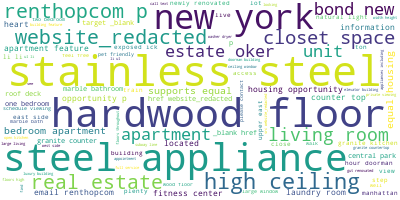

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'use', 'to', 'ul', 'li', 'id', 'amp', 'href', 'oker', 'renthopcom', 'div'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) # deacc=True removes punctuations

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = df['text_processed'].values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

In [ ]:
print(data_words[:1][0][:30])

['spacious', 'bedroom', 'bathroom', 'features', 'renovated', 'eat', 'kitchen', 'dishwasher', 'renovated', 'bathroom', 'beautiful', 'hardwood', 'floors', 'lots', 'sunlight', 'great', 'closet', 'space', 'freshly', 'painted', 'heat', 'hot', 'water', 'included', 'live', 'super', 'nearby', 'trains', 'contact', 'beakexclusive']


*For each document, the sentences are divided into separate blocks. This is a list of words for each document. Now we need to turn these words into indices.*

In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


*LDA model training*

In [ ]:
%%time 
from pprint import pprint

CPU times: user 11 µs, sys: 1e+03 ns, total: 12 µs
Wall time: 17.2 µs


I'll try to devide documents into 10 topics.

In [ ]:
# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, passes = 10)

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.020*"apartment" + 0.019*"rent" + 0.017*"call" + 0.014*"fee" + '
  '0.014*"free" + 0.014*"looking" + 0.011*"today" + 0.011*"email" + '
  '0.010*"please" + 0.009*"feel"'),
 (1,
  '0.025*"steel" + 0.025*"stainless" + 0.024*"apartment" + 0.022*"appliances" '
  '+ 0.022*"renovated" + 0.019*"hardwood" + 0.018*"bedroom" + 0.018*"unit" + '
  '0.017*"floors" + 0.017*"marble"'),
 (2,
  '0.013*"room" + 0.010*"center" + 0.010*"amenities" + 0.009*"views" + '
  '0.009*"fitness" + 0.008*"building" + 0.008*"floor" + 0.008*"lounge" + '
  '0.007*"windows" + 0.007*"custom"'),
 (3,
  '0.047*"new" + 0.042*"york" + 0.042*"real" + 0.038*"estate" + '
  '0.038*"opportunity" + 0.035*"bond" + 0.035*"equal" + 0.034*"housing" + '
  '0.034*"supports" + 0.026*"target"'),
 (4,
  '0.016*"building" + 0.014*"new" + 0.011*"city" + 0.010*"manhattan" + '
  '0.009*"located" + 0.008*"apartment" + 0.008*"restaurants" + 0.008*"york" + '
  '0.008*"one" + 0.007*"neighborhood"'),
 (5,
  '0.025*"apartment" + 0.012*"park"

The are all the 10 topics.
They contain the frequency of occurrence of a word within a particular topic.

In [ ]:
%pip install tmplot

I use "tmplot" package by Maxim Terpilovski for a handy representation of thetha matrix (https://tmplot.readthedocs.io/en/latest/index.html).

- Theta matrix (topics vs. docs matrix) represents distribution of documents by topics.
- For example, Topic 0 consists of Document 4 with a probability of 70%.

In [ ]:
import tmplot as tm

In [ ]:
theta = tm.get_theta(lda_model, corpus)
theta.T

/usr/local/lib/python3.7/dist-packages/tmplot/_helpers.py:39: UserWarning: Please install "tomotopy" package to analyze its models.
Run `pip install tomotopy` in the console.
  f'Please install "{package_name}" package to analyze its models.\n'


topics,0,1,2,3,4,5,6,7,8,9
docs,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.036205,0.000000,0.942738,0.000000,0.000000,0.000000
1,0.099536,0.131794,0.000000,0.000000,0.278284,0.000000,0.000000,0.101082,0.382545,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.100712,0.888475,0.000000,0.000000,0.000000
3,0.185571,0.151581,0.302643,0.042687,0.000000,0.000000,0.309183,0.000000,0.000000,0.000000
4,0.701180,0.000000,0.000000,0.000000,0.184540,0.000000,0.087354,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
49235,0.000000,0.160154,0.050055,0.195232,0.000000,0.178531,0.409269,0.000000,0.000000,0.000000
49236,0.000000,0.000000,0.139201,0.427274,0.000000,0.274588,0.145299,0.000000,0.000000,0.000000
49237,0.157763,0.404795,0.000000,0.000000,0.000000,0.000000,0.374754,0.000000,0.049351,0.000000


In [ ]:
%pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.071186  0.059789       1        1  27.549451
2     -0.204659  0.066359       2        1  14.399657
7     -0.158615  0.020336       3        1  13.047609
5      0.070750  0.042572       4        1   9.577822
4     -0.044565  0.070826       5        1   9.099785
1     -0.079356  0.074715       6        1   8.237200
3      0.196229 -0.016135       7        1   6.129299
0      0.105892 -0.055505       8        1   4.509885
9      0.227620  0.093080       9        1   3.974773
8     -0.042110 -0.356037      10        1   3.474520, topic_info=            Term          Freq         Total Category  logprob  loglift
324         york  10080.000000  10080.000000  Default  30.0000  30.0000
178         real   8937.000000   8937.000000  Default  29.0000  29.0000
73           new  27244.000000  27244.000000  Default  28.0000  28.0000
322  opportunity   6346.000000   6346.000000  Default  27.0000  27.0000
315       estate   7881.000000   7881.000000  Default  26.0000  26.0000
..           ...           ...           ...      ...      ...      ...
34     apartment   1098.367948  39723.865171  Topic10  -4.4685  -0.2284
107      doorman    923.804003  12178.072046  Topic10  -4.6416   0.7808
121      laundry    936.384490  15168.525705  Topic10  -4.6280   0.5748
7     dishwasher    901.356029  10249.927654  Topic10  -4.6662   0.9286
300         park    898.152107  11478.711481  Topic10  -4.6697   0.8118

[766 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1651      4  0.991447      abcd
807       6  0.997604  accented
289       1  0.060816    access
289       2  0.062706    access
289       3  0.117517    access
...     ...       ...       ...
324       5  0.193846      york
324       7  0.711000      york
324       9  0.001488      york
324      10  0.015674      york
4826      5  0.996709    yorker

[1963 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 8, 6, 5, 2, 4, 1, 10, 9])

I didn't use lemmatization and tokenization, so that there are several artifacts in documents. Overall, from the plot above, I can conclude that 10 is sufficient number of topics, since  the topics are separated (but some of them intersept sereously, though). Also, the topics themselves appeared to be somewhat comprehended.

**Extracting topics as features**

- I want to use probabilities of each document's belonging to a certain topic as features.
- In other words, our theta matrix is joined to the initial data set.

In [ ]:
topics = theta.T

In [ ]:
topics.index.name = None
topics = topics.rename_axis(None, axis=1)

In [ ]:
topics = topics.set_axis(['topic_1',
                          'topic_2',
                          'topic_3',
                          'topic_4',
                          'topic_5',
                          'topic_6',
                          'topic_7',
                          'topic_8',
                          'topic_9',
                          'topic_10'], axis=1, inplace=False)

In [ ]:
topics.head() # correct

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
0,0.000000,0.000000,0.000000,0.000000,0.036205,0.000000,0.942738,0.000000,0.000000,0.0
1,0.099536,0.131794,0.000000,0.000000,0.278284,0.000000,0.000000,0.101082,0.382545,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.100712,0.888475,0.000000,0.000000,0.0
3,0.185571,0.151581,0.302643,0.042687,0.000000,0.000000,0.309183,0.000000,0.000000,0.0
4,0.701180,0.000000,0.000000,0.000000,0.184540,0.000000,0.087354,0.000000,0.000000,0.0


In [ ]:
df = df.reset_index(drop=True)
#df

In [ ]:
data = pd.concat([df, topics], axis=1)
data.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,...,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
0,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,...,0.000000,0.000000,0.000000,0.000000,0.036205,0.000000,0.942738,0.000000,0.000000,0.0
1,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,...,0.099536,0.131794,0.000000,0.000000,0.278284,0.000000,0.000000,0.101082,0.382545,0.0
2,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.100712,0.888475,0.000000,0.000000,0.0
3,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,...,0.185571,0.151581,0.302643,0.042687,0.000000,0.000000,0.309183,0.000000,0.000000,0.0
4,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,...,0.701180,0.000000,0.000000,0.000000,0.184540,0.000000,0.087354,0.000000,0.000000,0.0


**Recoding "interest_level" variable**

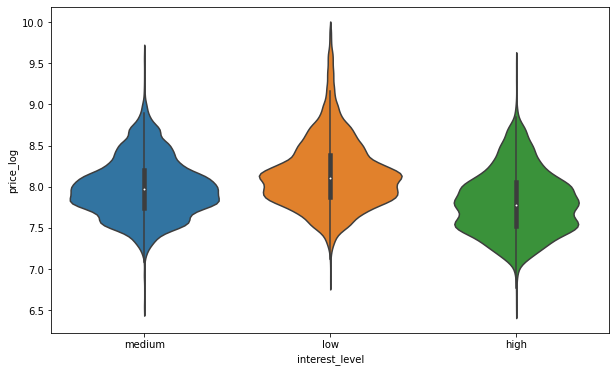

In [ ]:
sns.violinplot(x='interest_level', y='price_log', data=data)

- It seems that logged price depends on the level of interest.
- Therefore, I use recoded values of interest levels as fuatures.

In [ ]:
data.loc[data['interest_level'] == 'low', ['interest_level_recod']] = 0
data.loc[data['interest_level'] == 'medium', ['interest_level_recod']] = 1
data.loc[data['interest_level'] == 'high', ['interest_level_recod']] = 2

- It is better to create dummy variables from interest levels.

In [ ]:
data['is_low_interest'] = data['interest_level'].apply(
    lambda x: 1 if x == 'low' else 0)
#data['is_low_interest'].value_counts()

In [ ]:
data['is_medium_interest'] = data['interest_level'].apply(
    lambda x: 1 if x == 'medium' else 0)
#data['is_medium_interest'].value_counts()

In [ ]:
data['is_high_interest'] = data['interest_level'].apply(
    lambda x: 1 if x == 'high' else 0)
#data['is_high_interest'].value_counts()

**What else could be added as features?**

*Idea: Calculation of distance from the center of Manhattan based on coordinates**

I use a so-called 'taxicab distance' or a "Manhattan distance" (https://en.wikipedia.org/wiki/Taxicab_geometry)

Distance = |x2 - x1| + |y2 - y1|, where:
- *x* is longitude
- and *y* is latitude 


I use the coordinates of Times Square as the center of NY with the most expensive real estate. Hence, the the farther from Times Square, the cheaper (https://www.yourlawyer.com/library/nyc-housing-prices-by-borough-and-neighborhood/).
 
The latitude of Times Square, NYC, USA is 40.758896 (x1), and the longitude is -73.985130 (y1).

**Selecting relevant columns**

In [ ]:
data = data.drop(['bathrooms', 'building_id', 'created', 'description', 'display_address', 'features', 
                  'listing_id', 'manager_id', 'photos', 'street_address', 'interest_level',
                  'text_processed', 'interest_level_recod'], axis=1)

In [ ]:
#data.columns 

- Let's save the final data set with the generated features.

In [ ]:
data.to_csv('/content/drive/MyDrive/Colab Notebooks/data_ml_exam.csv', sep='\t')



---
###**Test sample preparation**


---





In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_ml_exam.csv', sep='\t')

In [ ]:
#data.head()

In [ ]:
data = data.drop(['Unnamed: 0'], axis=1)

In [ ]:
data = data.drop(['price'], axis=1)

In [ ]:
data.head()

,bedrooms,latitude,longitude,price_log,bathrooms_int,features_number,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,is_low_interest,is_medium_interest,is_high_interest
0,1,40.7108,-73.9539,7.783224,1,7,0.000000,0.000000,0.000000,0.000000,0.036205,0.000000,0.942738,0.000000,0.000000,0.0,0,1,0
1,2,40.7513,-73.9722,8.242756,1,6,0.099536,0.131794,0.000000,0.000000,0.278284,0.000000,0.000000,0.101082,0.382545,0.0,1,0,0
2,2,40.7575,-73.9625,8.159089,1,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.100712,0.888475,0.000000,0.000000,0.0,0,1,0
3,3,40.7145,-73.9425,8.006368,2,0,0.185571,0.151581,0.302643,0.042687,0.000000,0.000000,0.309183,0.000000,0.000000,0.0,0,1,0
4,0,40.7439,-73.9743,7.935587,1,4,0.701180,0.000000,0.000000,0.000000,0.184540,0.000000,0.087354,0.000000,0.000000,0.0,1,0,0


Let's split the data set set into the training and test sets in the mind 85%:15% respectively. 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
median = data['price_log'].median()

In [ ]:
data['price_log_bin'] = data['price_log'].apply(
    lambda x: 1 if x >= median else 0)

data['price_log_bin'].value_counts()

1    24690
0    24550
Name: price_log_bin, dtype: int64

In [ ]:
X = data.loc[:, ~data.columns.isin(['price_log_bin', 'price_log'])]

In [ ]:
y = data['price_log_bin']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=17)

In [ ]:
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (41854, 18)
Shape of X_test: (7386, 18)
Shape of y_train: (41854,)
Shape of y_test: (7386,)




---
###**RandomForest with different parameter options**


---




In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Инициализируем стратифицированную разбивку нашего датасета для валидации
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Инициализируем наш классификатор с дефолтными параметрами
rfc = RandomForestClassifier(5, n_jobs=-1, oob_score=True)

# Обучаем на тренировочном датасете
results = cross_val_score(rfc, X_train, y_train, cv=skf)

# Оцениваем точность на тестовом датасете
print("CV accuracy score: {:.2f}%".format(results.mean()*100))

CV accuracy score: 86.75%


- accuracy score = 86.75%. Let's try to improve this result and see how the learning curves behave when the main parameters change.

- Let's start with the number of trees.

In [ ]:
# Инициализируем валидацию
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]

# Обучаем на тренировочном датасете
for ntrees in trees_grid:
    rfc = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 89.69% with 100 trees


In [ ]:
import matplotlib.pyplot as plt

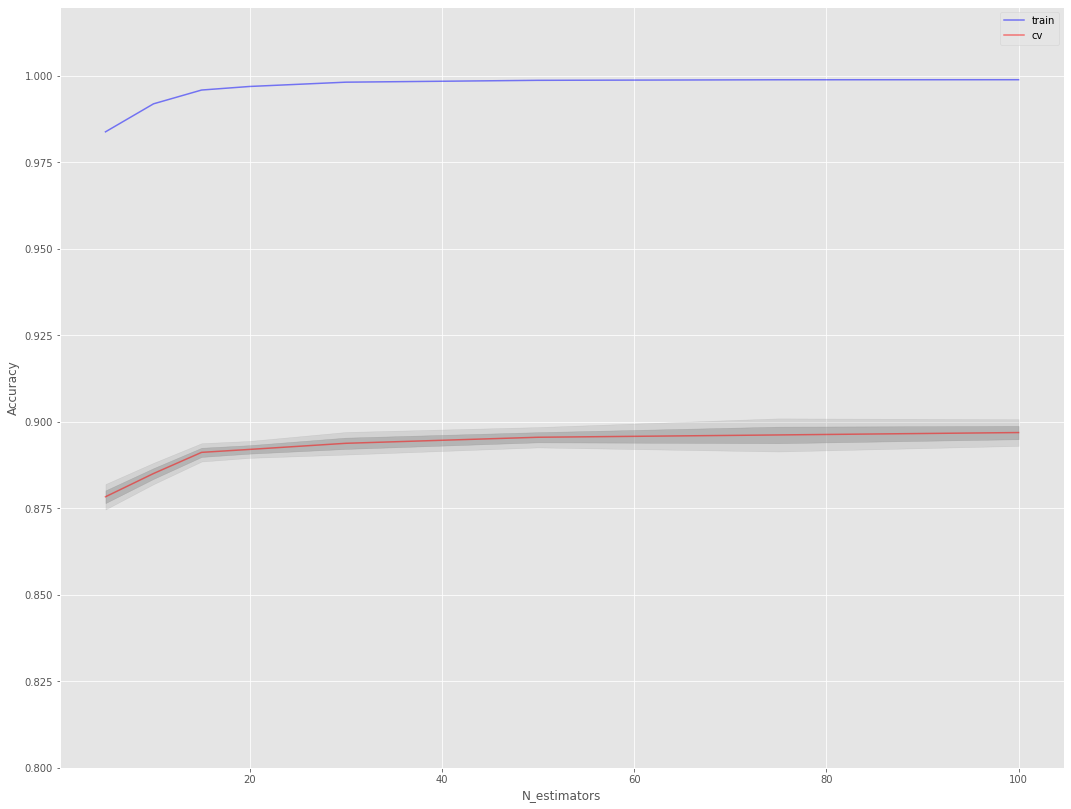

In [ ]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(18, 14))
ax.plot(trees_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(trees_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(trees_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.80,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators");

- When reaching a certain number of trees, accurancy score stops increasing. 

- With the number of trees of 30, accurancy score comes to a plateau.

- Accurancy score (using training set) is nearly 100%. It signals about overfitting.

- To avoid this problem, regularization parameters should be added to the model.

- Let's start with the maximum depth parameter (max_depth) and fix the number of trees by 100.

Best accuracy on CV is 89.70% with 30 max_depth


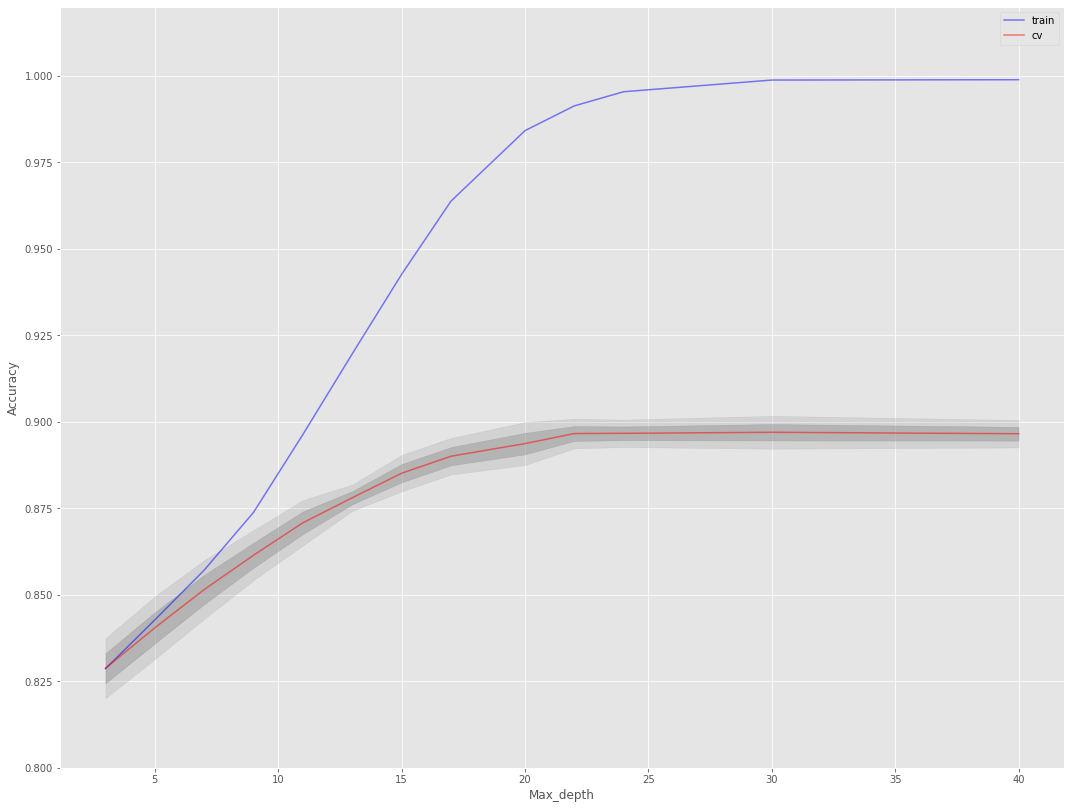

In [ ]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24, 30, 40]

# Обучаем на тренировочном датасете
for max_depth in max_depth_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, oob_score=True, max_depth=max_depth)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_depth".format(max(test_acc.mean(axis=1))*100, 
                                                        max_depth_grid[np.argmax(test_acc.mean(axis=1))]))

fig, ax = plt.subplots(figsize=(18, 14))
ax.plot(max_depth_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.80,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_depth");

- Accurancy score of the model increased sligthly (to 89.7%) with the parameter of max depth of 30. 
- Let's apply another regulator parameter of min_samples_leaf.

In [ ]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

# Обучаем на тренировочном датасете
for min_samples_leaf in min_samples_leaf_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, min_samples_leaf=min_samples_leaf)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} min_samples_leaf".format(max(test_acc.mean(axis=1))*100, 
                                                        min_samples_leaf_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 89.69% with 1 min_samples_leaf


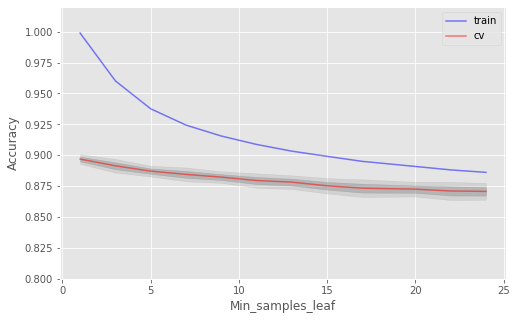

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(min_samples_leaf_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(min_samples_leaf_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.8,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Min_samples_leaf");

- Overfitting reduced by 2.5%, while accurancy score is still 89.7%.
- Let's use a parameter of "max_features" to find an optimal number of features. 

Best accuracy on CV is 90.22% with 12 max_features


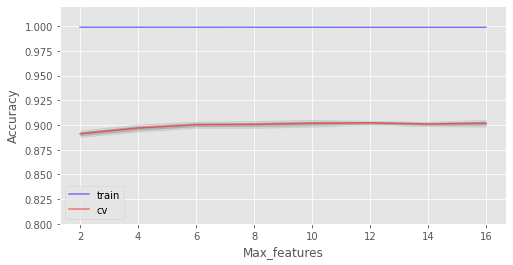

In [ ]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_features_grid = [2, 4, 6, 8, 10, 12, 14, 16]

# Обучаем на тренировочном датасете
for max_features in max_features_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, max_features=max_features)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_features".format(max(test_acc.mean(axis=1))*100, 
                                                        max_features_grid[np.argmax(test_acc.mean(axis=1))]))

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_features_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_features_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.80,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_features");

- With 4 features, the best accurancy score is 90.22%. 



---
###**Using GridSearch for parameters selecting**


---




In [ ]:
# Сделаем инициализацию параметров, по которым хотим сделать полный перебор
parameters = {'max_features': [8, 10, 12], 'min_samples_leaf': [1, 3, 5], 'max_depth': [22, 25, 30]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, 
                             n_jobs=-1, oob_score=True)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(X, y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [22, 25, 30], 'max_features': [8, 10, 12],
                         'min_samples_leaf': [1, 3, 5]},
             verbose=1)

In [ ]:
gcv.best_estimator_, gcv.best_score_

(RandomForestClassifier(max_depth=25, max_features=12, n_jobs=-1, oob_score=True,
                        random_state=42), 0.9017668562144598)

- The best accurancy score = 90.2% (max_depth=25, max_features=12, min_samples_leaf = 1).



---
###**Fitting random forrest classifier with recommended parameters**
---




In [ ]:
rfc_test = RandomForestClassifier(max_depth=25, n_jobs=-1, oob_score=True, 
                                  random_state=42) # parameters recommended by GridSearch

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(rfc_test, X_test, y_test, cv=skf)

In [ ]:
print("CV accuracy score: {:.2f}%".format(results.mean()*100))

CV accuracy score: 86.08%


- Accurency score for the RFC model trained on test sample is good and recommended parameters is good.

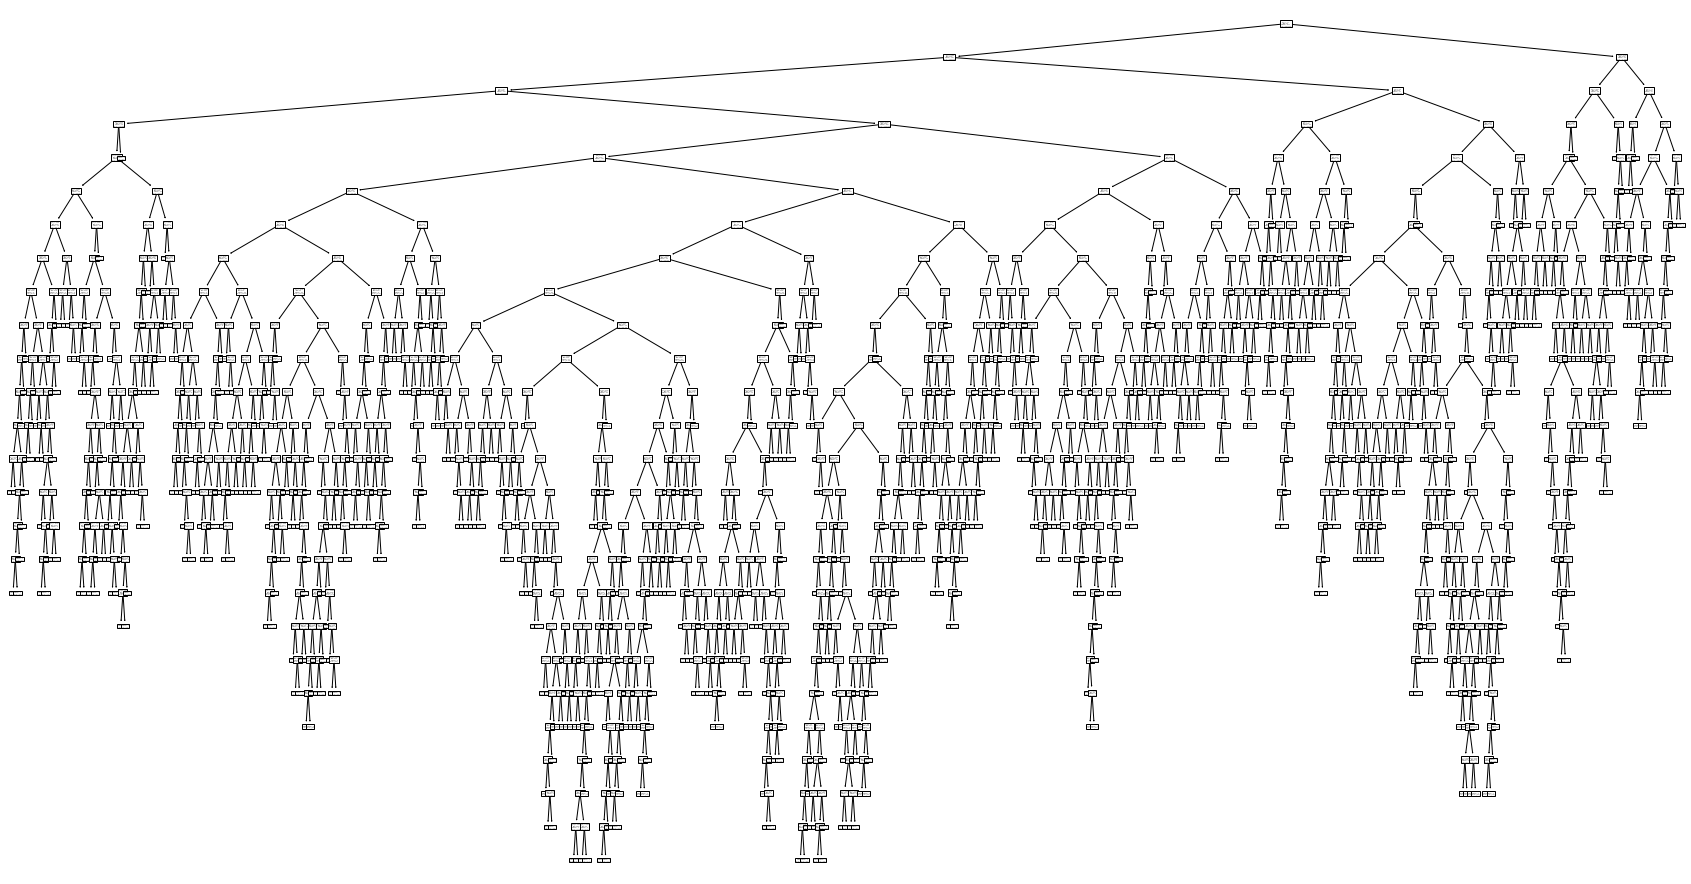

In [ ]:
plt.rcParams['figure.figsize'] = 30, 16
from sklearn import tree
t = tree.plot_tree(rfc_test.estimators_[0])



---


###**Using a random forest to select important features for regression**


---



In [ ]:
import pandas as pd
import sklearn as sk
import sklearn.ensemble as ske
import matplotlib.pyplot as plt

In [ ]:
X = data.loc[:, ~data.columns.isin(['price_log_bin', 'price_log'])]

In [ ]:
y = data['price_log']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=17)

In [ ]:
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (41854, 18)
Shape of X_test: (7386, 18)
Shape of y_train: (41854,)
Shape of y_test: (7386,)


In [ ]:
X_train.to_csv('/content/drive/MyDrive/Colab Notebooks/X_train.csv')
X_test.to_csv('/content/drive/MyDrive/Colab Notebooks/X_test.csv')
y_train.to_csv('/content/drive/MyDrive/Colab Notebooks/y_train.csv')
y_test.to_csv('/content/drive/MyDrive/Colab Notebooks/y_test.csv')

In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/X_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/X_test.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/y_test.csv')

In [ ]:
X_train = X_train.drop("Unnamed: 0", axis=1)
X_test = X_test.drop("Unnamed: 0", axis=1)
y_train = y_train.drop("Unnamed: 0", axis=1)
y_test = y_test.drop("Unnamed: 0", axis=1)

In [ ]:
regRF = ske.RandomForestRegressor()

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
regRF.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
fet_ind = np.argsort(regRF.feature_importances_)[::-1]
fet_imp = regRF.feature_importances_[fet_ind]

Text(0.5, 1.0, 'Features importance')

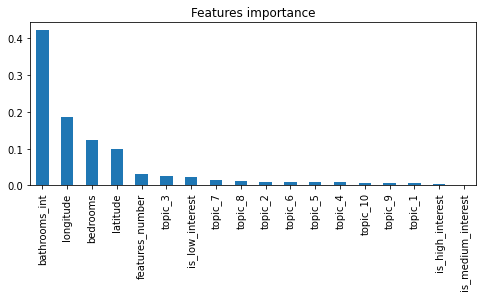

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
labels = X_train.columns[fet_ind]
pd.Series(fet_imp, index=labels).plot(kind='bar', ax=ax)
ax.set_title('Features importance')

- Visually, it seems that the elbow happenhs after the feature ("is_low_interest"). In this scree plot, beginning with feature "topic_7" importance appears to be worse and worse.

In [ ]:
X_test = X_test[['bathrooms_int', 'longitude', 'bedrooms', 'latitude', 'features_number',
                 'topic_3', 'is_low_interest']]

In [ ]:
#X_test.head()

In [ ]:
X_test.to_csv('/content/drive/MyDrive/Colab Notebooks/X_test_final_models.csv')



---
###**Fitting models**

---




###*Fitting a linear regressiom*

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/y_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/X_test_final_models.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/y_test.csv')

In [ ]:
y_test = y_test['price_log']

In [ ]:
X_test = X_test.drop(["Unnamed: 0"], axis=1)

In [ ]:
X_train = X_train.drop("Unnamed: 0", axis=1)
y_train = y_train.drop("Unnamed: 0", axis=1)

In [ ]:
X_train = X_train[['bathrooms_int', 'longitude', 'bedrooms', 'latitude', 'features_number',
                 'topic_3', 'is_low_interest']]

In [ ]:
# Create an instance of a linear regression model and fit it to the data with the fit() function:
modLR = LinearRegression().fit(X_train, y_train) 

In [ ]:
# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = modLR.score(X_train, y_train)
print('R-squared:', r_sq)

R-squared: 0.5850665517365744


- The linear regression model managed to explain ~58.5% of variance.

In [ ]:
# Print the Intercept:
print('intercept:', modLR.intercept_)
# Print the Slope:
print('slope:', modLR.coef_) 


intercept: [5.72041943]
slope: [[ 0.14402718 -0.06763524 -0.03762672  0.28573202  0.01240915  1.38001824
   1.75304441  1.85093577  1.67662475  1.79767776  1.24606416  1.62313202
   1.67954111  1.82924214  1.74545845  0.14428114 -0.01355911 -0.13072203]]


In [ ]:
# Predict a Response and print it:
y_pred = modLR.predict(X_test)
print('Predicted response:', y_pred, sep='\n')

Predicted response:
[[7.73324397]
 [7.8037097 ]
 [8.06215958]
 ...
 [7.85431523]
 [8.03626667]
 [8.24872582]]


###*Logistic regression fitting*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_ml_exam.csv', sep='\t')

In [ ]:
#data.head()

In [ ]:
data = data.drop(['Unnamed: 0'], axis=1)

In [ ]:
data = data.drop(['price'], axis=1)

In [ ]:
#data.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
median = data['price_log'].median()

In [ ]:
data['price_log_bin'] = data['price_log'].apply(
    lambda x: 1 if x >= median else 0)

data['price_log_bin'].value_counts()

1    24690
0    24550
Name: price_log_bin, dtype: int64

In [ ]:
X = data.loc[:, ~data.columns.isin(['price_log_bin', 'price_log', 'bathrooms_int', 
                                    'longitude', 'bedrooms', 'latitude', 'features_number',
                                    'topic_3', 'is_low_interest'])]

In [ ]:
y = data['price_log_bin']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=17)

In [ ]:
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (41854, 11)
Shape of X_test: (7386, 11)
Shape of y_train: (41854,)
Shape of y_test: (7386,)


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.67


- Accurancy score is 67% (< 70%).

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2328 1303]
 [1138 2617]]


- The result is telling us that we have 2328 + 2617 (4945) correct predictions vs. 1138 + 1303 (2441) incorrect predictions.

###**Random forrest classifier**

In [ ]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(max_depth=25, min_samples_leaf = 1)

In [ ]:
cross_val_score(rfc, X_test, y_test).mean()

0.6566480348656851

Accurancy score = 66%.



---


###**Model comparison**


---



- Overall, logistic regression provides the best accurancy score (67%) for this set of features. However, before deletion of unimportant features the accurancy score of RFC (test sample with recommended parameters by GridSearch) was 86%.